# Sheet 2 - Introduction

By: Genivika Mann, Jonah, Fatemeh Salehi, Helia Salimi, Fabrice Beaumont

## Ex1 - Understanding Your Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Perform data cleaning procedures such that your final dataset is usable in the following questions

#### For the file 'processedClevelandData.csv'

In [2]:
data = pd.read_csv("processedClevelandData.csv", sep=';', index_col = 'id')
data.head(4)

,Unnamed: 0,Unnamed: 0.1,Age,Sex,cp,trestbps,chol,fbs,resetecg,thalach,exang,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,0,0,63.0,1.0,1.0,145.0,233.0 mg/dl,1.0,2.0,150.0,0.0,3.0,0.0,6.0,0
2,1,1,67.0,1.0,4.0,160.0,286.0 mg/dl,0.0,2.0,108.0,1.0,2.0,3.0,3.0,2
3,2,2,67.0,1.0,4.0,120.0,229.0 mg/dl,0.0,2.0,129.0,1.0,2.0,2.0,7.0,1
4,3,3,37.0,1.0,3.0,130.0,250.0 mg/dl,0.0,0.0,187.0,0.0,3.0,0.0,3.0,0


In [3]:
### Remove the useless second index column
data.drop(columns='Unnamed: 0', inplace=True)
data.drop(columns='Unnamed: 0.1', inplace=True)

In [4]:
### Check, if any missing values have to be filled in
data.isna().sum().sum()

0

In [5]:
### There are no NaN values, but we notice some '?' values. For example
data.loc[288]['ca']

'?'

In [6]:
### One could replace them in the following way:
# data.replace({'ca': {'?': np.nan}}, regex=False,inplace=True)
# data.loc[288]['ca']
### But we are not sure if this is desired. So we didnt do it.

In [7]:
### W.r.t. task 1.3: Column 'chol' stores the values AND the unit mg/dl as a string
### Lets remove the unit to be left with directly usable values
data['chol'] = data['chol'].map(lambda x: x.rstrip('mg/dl'))
data['chol'] = data['chol'].astype(float) ### 'int' seems reasonable too

In [8]:
data.head(4)

,Age,Sex,cp,trestbps,chol,fbs,resetecg,thalach,exang,slope,ca,thal,num
id,,,,,,,,,,,,,
1,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,3.0,0.0,6.0,0
2,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,2.0,3.0,3.0,2
3,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.0,2.0,7.0,1
4,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.0,0.0,3.0,0


In [9]:
### With the thoughs from task 1.4 we can specify some datatypes:
### (We can not do it for the columns with missing values '?' in it)
int_cols = ['Age', 'Sex', 'cp', 'trestbps']
for col in int_cols:
    data[col] = data[col].astype(int)

#### For the file 'featureDescription.csv'

When first reading in the file, we notices some messed up separation.
We noticed, that often the delimiter ; was inside a quotationmark.
By flipping these, we get a better - but still not perfect readout.
Alternatively one could clean up the small data by hand.

In [10]:
file_in = open("featureDescription.csv", "rt")
file_out = open("featureDescription_clean.csv", "wt")
for line in file_in:
    file_out.write(line.replace(';"', '";'))
file_in.close()
file_out.close()

features = pd.read_csv("featureDescription.csv", sep=';')

### 2. For each type of diagnosis of heart disease, find the following for the resting blood pressure:

#### Taking a look at the features reveals, that the 'diagnosis of heart disease' is given in the column 'num'

#### a. Mean

In [11]:
### One can get the mean of the (resting) 'blood pressure' [mmHg] with: 
#data['trestbps'].mean()
### But to get it for each type of diagnosis of heart disease ('num') separately,
### group the rows with the same 'num' entry first
mean_per_heartDisease = data.groupby(['num']).mean()

In [12]:
#mean_per_heartDisease['trestbps']
for index, row in mean_per_heartDisease.iterrows():
    print(f"Heart disease {index} has an average blood pressure of {row['trestbps']:.2f} mmHg")

Heart disease 0 has an average blood pressure of 129.25 mmHg
Heart disease 1 has an average blood pressure of 133.25 mmHg
Heart disease 2 has an average blood pressure of 134.19 mmHg
Heart disease 3 has an average blood pressure of 135.46 mmHg
Heart disease 4 has an average blood pressure of 138.77 mmHg


Text(0, 0.5, 'Mean [mmHg]')

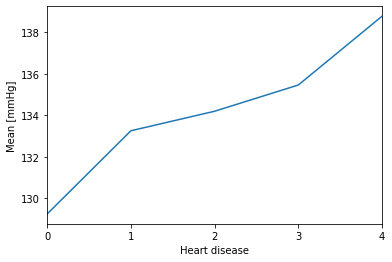

In [13]:
mean_per_heartDisease['trestbps'].plot()
plt.xticks(np.arange(0, 4.1, 1.0))
plt.xlabel("Heart disease")
plt.ylabel("Mean [mmHg]")

#### b. Median

In [14]:
median_per_heartDisease = data.groupby(['num']).median()
for index, row in median_per_heartDisease.iterrows():
    print(f"Heart disease {index} has an median blood pressure of {row['trestbps']:.2f} mmHg")

Heart disease 0 has an median blood pressure of 130.00 mmHg
Heart disease 1 has an median blood pressure of 130.00 mmHg
Heart disease 2 has an median blood pressure of 133.00 mmHg
Heart disease 3 has an median blood pressure of 130.00 mmHg
Heart disease 4 has an median blood pressure of 145.00 mmHg


Text(0, 0.5, 'Median [mmHg]')

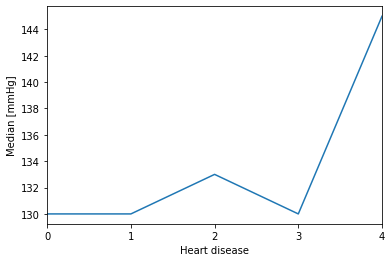

In [15]:
median_per_heartDisease['trestbps'].plot()
plt.xticks(np.arange(0, 4.1, 1.0))
plt.xlabel("Heart disease")
plt.ylabel("Median [mmHg]")

#### c. Standard deviation

In [16]:
stdDev_per_heartDisease = data.groupby(['num']).std()
for index, row in stdDev_per_heartDisease.iterrows():
    print(f"Heart disease {index} has a std. dev. in blood pressure of {row['trestbps']:.2f} mmHg")

Heart disease 0 has a std. dev. in blood pressure of 16.20 mmHg
Heart disease 1 has a std. dev. in blood pressure of 18.03 mmHg
Heart disease 2 has a std. dev. in blood pressure of 17.90 mmHg
Heart disease 3 has a std. dev. in blood pressure of 21.66 mmHg
Heart disease 4 has a std. dev. in blood pressure of 17.19 mmHg


Text(0, 0.5, 'Standard deviation [mmHg]')

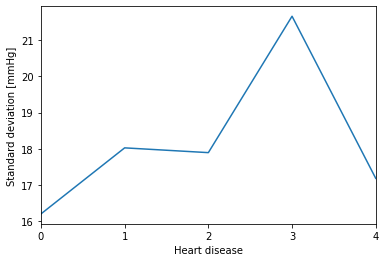

In [17]:
stdDev_per_heartDisease['trestbps'].plot()
plt.xticks(np.arange(0, 4.1, 1.0))
plt.xlabel("Heart disease")
plt.ylabel("Standard deviation [mmHg]")

### 3. Use Spearman's and Kendall correlation to quantify the correlation between age and the following.

In [18]:
meta_data = [("resting blood pressure", "trestbps", "mmHg"), ("serum cholesterol level", "chol", "mg/dl"), ("maximum heart rate achieved", "thalach", "bpm")]

#### Spearman

In [19]:
print("The Spearman's correlation between age and ... ")
for name, col, unit in meta_data:
    print(f"{name} is:\t {data.corr(method ='spearman')['Age'][col]:.3f} \t[{unit}]")

The Spearman's correlation between age and ... 
resting blood pressure is:	 0.292 	[mmHg]
serum cholesterol level is:	 0.191 	[mg/dl]
maximum heart rate achieved is:	 -0.392 	[bpm]


#### Kendall

In [20]:
print("The Kendall's correlation between age and ... ")
for name, col, unit in meta_data:
    print(f"{name} is:\t {data.corr(method ='kendall')['Age'][col]:.3f} \t[{unit}]")

The Kendall's correlation between age and ... 
resting blood pressure is:	 0.206 	[mmHg]
serum cholesterol level is:	 0.132 	[mg/dl]
maximum heart rate achieved is:	 -0.276 	[bpm]


#### Also, which variable(s) are most correlated with age? Illustrate with heatmaps.

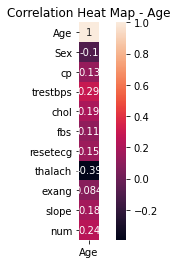

In [21]:
data_spearman_age = pd.DataFrame(data.corr(method ='spearman')['Age'])
### Plot the heatmap and annotation on it
sns.heatmap(data_spearman_age, annot=True, square=True)
plt.title('Correlation Heat Map - Age')
plt.show()

Of course, 'Age' is perfectly correlated with 'Age'. 
Besides this, we can identiy the second highest positive correlation which has magnitude ~0.29 and is with the resting blood pressure value:

In [22]:
### Get the second highest correlation value
second_max_corr = data.corr(method ='spearman')['Age'].sort_values()[-2]
### Get the feature name, that corresponds to this value
true_false_df = (data_spearman_age.values == second_max_corr)
second_max_feature = data_spearman_age.index[true_false_df.argmax()]

print(f"The highest non-trivial corrleation (Spearman) with the feature 'Age' is with feature")
print(f"'{second_max_feature}' and it has magnitude of approximately '{second_max_corr:.3f}'.")

The highest non-trivial corrleation (Spearman) with the feature 'Age' is with feature
'trestbps' and it has magnitude of approximately '0.292'.


In [23]:
### Lets do the same for the least correlation
min_corr = data.corr(method ='spearman')['Age'].sort_values()[0]
### Get the feature name, that corresponds to this value
min_feature = data_spearman_age.index[(data_spearman_age.values == min_corr).argmax()]

print(f"The lowest corrleation (Spearman) with the feature 'Age' is with feature")
print(f"'{min_feature}' and it has magnitude of approximately '{min_corr:.3f}'.")

The lowest corrleation (Spearman) with the feature 'Age' is with feature
'thalach' and it has magnitude of approximately '-0.392'.


### 4. From your understanding, which of the features can be labeled as discrete random variables and which features as continuous random variables?

In [24]:
data.head(2)

,Age,Sex,cp,trestbps,chol,fbs,resetecg,thalach,exang,slope,ca,thal,num
id,,,,,,,,,,,,,
1,63,1,1,145,233.0,1.0,2.0,150.0,0.0,3.0,0.0,6.0,0
2,67,1,4,160,286.0,0.0,2.0,108.0,1.0,2.0,3.0,3.0,2


#### Let's go through them one by one:
- 'iD' has integer values and thus a DISCRETE range. It is not really a random variable though.
- 'Age' in general is a difference between time and could be understood as a continuous value. But in this databas it only takes integer values (years) and thus is DISCRETE.
- 'Sex' is clearly a DISCRETE variable by definition: 
    - 1: male,
    - 0: female
- 'cp' (chest pain type) is DISCRETE by definition: 
    - 1: typical angina, 
    - 2: atypical angina, 
    - 3: non-anginal pain, 
    - 4: asymptomatic
- 'trestbps' (resting blood pressure) is given in torr (unit of ressure, mmHg). It could be intepreted as continuous. But considering the given data which only has integer values, a DISCRETE interpretation is fine.
- 'chol' (serum cholestoral) - same as with 'trestbps' but unit mg/dl - DISCRETE
- 'fbs' (fasting blood sugar) is DISCRETE by definition:
    - 0: fasting blood sugar >= 120 mg/dl
    - 1: fasting blood sugar >  120 mg/dl
- 'resetecg' (resting electrocardiographic results) is DISCRETE by definition:
    - 0: normal
    - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
    - showing probable or definite left ventricular hypertrophy by Estes' criteria "
- 'thalach' (maximum heart rate achieved) similar to 'trestbps'. Since it is measured in bpm (beats per minute), its values can be seen as integers and thus DISCRETE
- 'exang' (exercise induced angina) is DISCRETE by definition
    - 0: no
    - 1: yes
- 'slope' (slope of the peak exercise ST segment) is DISCRETE by definition
    - 1: upsloping
    - 2: flat
    - 3: downsloping
- 'ca' (number of major vessels colored by flourosopy) is DISCRETE by definition since it is a count (0-3)
- 'thal' is DISCRETE by definition:
    - 3: normal
    - 6: fixed defect
    - 7: reversable defect
- 'num' (diagnosis of heart disease) is DISCRETE by definition:
    - 0: angiographic disease status = <50 % diameter narrowing
    - 1: angiographic disease status = >50 % diameter narrowing

### 5. Describe the distribution for the values of the "thalach" feature? Illustrate with a plot.

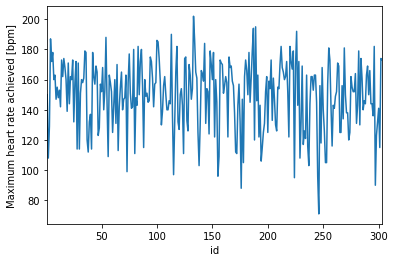

In [25]:
data['thalach'].plot()
plt.ylabel("Maximum heart rate achieved [bpm]")
plt.show()

It seems like there is some noise in the data. Values below 100 bpm as a maximum heart rate seem unreasonable.

<AxesSubplot:ylabel='Density'>

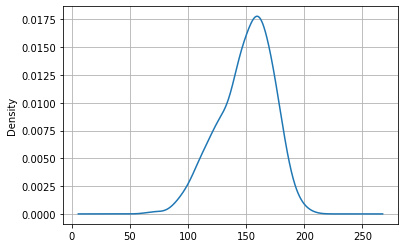

In [26]:
data['thalach'].plot.density(grid=True)

### 6. Plot the frequency of “Sex” variable in the dataset and describe what you observe in the plot. Similarly plot and describe the 'ca' feature for the male participants.

#### "Sex"

In [27]:
data['Sex'].value_counts()

1    206
0     97
Name: Sex, dtype: int64

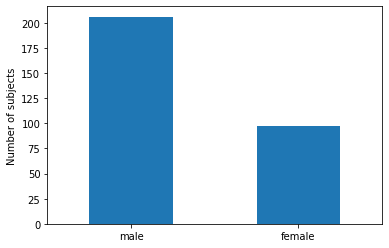

In [28]:
### 'rot=0' leads to horizontal x-values
ax = data['Sex'].value_counts().plot('bar', rot=0)
ax.set_xticklabels(["male", "female"])
ax.set_ylabel("Number of subjects")
plt.show()

This means there are almost twice as much entries with value 'male' than the opposite 'female'.

## "Ca"

In [29]:
data['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

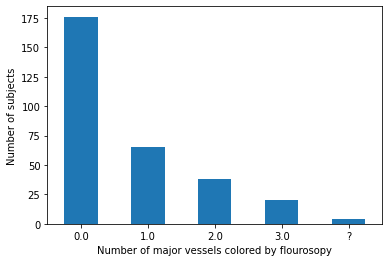

In [30]:
ax = data['ca'].value_counts().plot('bar', rot=0)
ax.set_xlabel("Number of major vessels colored by flourosopy")
ax.set_ylabel("Number of subjects")
plt.show()

Similarly to the "Sex" value, the database contains disproportionally more subjects where no major vessels were colored by flourosopy.

### 7. Detect outlier patients for features "trestbps'' and "chol". Illustrate with plots.

#### "trestbps"

<AxesSubplot:xlabel='trestbps'>

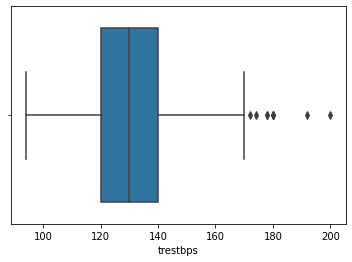

In [31]:
sns.boxplot(x=data['trestbps'])

Values above 170 mm Hg can be seen as outliers. And indeed - a resting blood pressure this high is quite unusual.

#### "chol"

In [32]:
### We cannot compute a boxplot or other data analysis while having
### the non numeric '?' entries. So lets temporarily replace them with NaN:
data_numeric_chol = data.replace({'ca': {'?': np.nan}}, regex=False)

<AxesSubplot:xlabel='chol'>

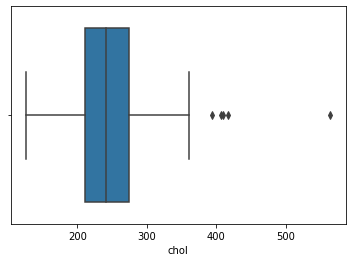

In [33]:
sns.boxplot(x=data_numeric_chol['chol'])

Values above 350 mg/dl can be seen as outliers.